In [2]:
import numpy as np
import numpy.linalg as la
import graph
import matplotlib.pyplot as plt
import helper_function as hf

# Google PageRank

Google's dominance as a search engine came from their [_PageRank_](http://ilpubs.stanford.edu:8090/422/1/1999-66.pdf) algorithm, named after co-founder Larry Page.  By assigning each page a relative rank, web searches can give more relevant results.

The idea here is to model a user surfing different web pages by randomly clicking on links.  Pages with more incoming links (they are cited more often) are presumed to be higher quality and therefore get a higher PageRank value.

We can model this as a graph, where each webpage has a chance of moving to another one:

<img src="PageRank Example.svg" width="300px"></img>

This probability of moving from one page to another is estimated from the number of outgoing links, more formally the probability of moving from page $j$ to page $i$ is given by:

$$ p\left(i \vert j\right) = \frac{\text{number of links from }j\text{ to }i}{\text{total links going out of } j}$$

For example, if Google has 4 outgoing links:

 - 1 to Twitter
 - 1 to Reddit
 - 2 to Facebook

Then it would have a $0\%$ probability of linking to itself, $25\%$ to Twitter, $25\%$ to Reddit, and $50\%$ to Facebook.

Let's first start with a small example. You are given an adjacency matrix ${\bf A}$ such that each entry $A_{ij}$ contains the number of links going *into* page $i$ *from* $j$.

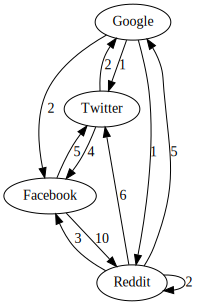

In [7]:
A = np.array([[0,  2,  0,  5],
              [1,  0,  5,  6],
              [2,  4,  0,  3],
              [1,  0, 10,  2]])

labels = ['Google', 'Twitter', 'Facebook', 'Reddit']

graph.draw_matrix(A.T, labels)

**Check your answers!**

First, convert this to a Markov matrix `M2` by converting each entry to a probability. Recall you can retrieve the column of a NumPy matrix with the syntax `A[:,i]`. 

In [ ]:
#grade_clear
#clear
n = len(A)
M2 = np.zeros((n, n))
# Convert entries in M2 below
#clear
for i in range(len(A[0])):
    M2[:,i] = A[:,i]/ la.norm(A[:,i],1)

**Try this!**

Now, use power iteration as you have done before to find the steady-state of the Markov matrix. You can use any starting vector you like, as long as it is normalized. This steady-state is the relative PageRank of each webpage. Store your result in `eigvec`.

In [ ]:
#clear
x = np.random.rand(4)
x /= la.norm(x, 1)

eigvec = power_iteration(M2, x)

Now you can print it out:

In [ ]:
print(eigvec)

What is the highest ranking site here?  You can use `labels` to get a name from a node index.

In [ ]:
print(labels[np.argmax(eigvec)])

## Larger Example

Lets try a larger example with more websites.  We will have a slightly different format to represent our links.

In [ ]:
num_pages = 20

# Array with the edges
edges = np.loadtxt("pagerank_large.txt").astype(np.int64)

# these are random, don't look too deeply into this...
labels = ['Google', 'Twitter', 'Facebook', 'Reddit', 'WordPress', 'ArXiv', 'Amazon', 'UIUC', 'Wikipedia', 'IMDb',
          'GitHub', 'Yahoo!', 'Flickr', 'Apple', 'Baidu', 'VKontakte', 'Mozilla', 'LinkedIn', 'YouTube', 'NASA']

print(edges)

The link information is given in the `edges` 2d numpy array, that has shape `(total number of links, 2)`

In [ ]:
edges.shape

Each row of `edges` has two entries, `[a,b]`, representing an edge (outgoing link) from website with index `a` to website with index `b`.

For example, if the row is `[1, 8]`, then there is an edge/link going out of node `1` into node `8`.

From the `edges` array, first create the adjacency matrix such that ${\bf A}_{i,j}$ is equal to $1$ if webpage $i$ can be reached from webpage $j$, and $0$ otherwise.  You can assume that there are $n=20$ websites in total, and thus you will have a $20\times 20$ adjacency matrix.

In [ ]:
A2 = np.zeros((num_pages, num_pages))
for edge in edges:
    A2[edge[1], edge[0]] = 1
A2

We can draw the adjacency matrix for a visual depiction of what is going on:

In [ ]:
graph.draw_matrix(A2.T, labels, show_weights=False)

Now, create the Markov matrix  ${\bf M}$ from the adjacency matrix as you have done before.  Recall that in order to satisfy the Markov property that the column sum is equal to 1, we need to normalize columns by dividing its values by the column sum.

In [ ]:
M = A2 / la.norm(A2, 1, axis=0)
M

What do you observe? Looks like you may have tried to compute divisions by zero!

**What happens when there is no outgoing link from a website?**

The column corresponding to that website will only have zero entries, and if we apply the above normalization, we will have a division by zero.

How would you instead model the behavior of a web-surfer that is browsing a website without outgoing links?

**Discuss this with your group.** Come up with ideas first, before reading the following text.

![](brainstorming.jpg)




**The PageRank algorithm proposes the following:**
once the web surfer reaches a page without outgoing links, we can assume that he will probably not stay on that webpage forever.

Instead it assumes that the web surfer will move to any of the webpages with equal probability $1/n$, where $n$ (defined as `num_pages`) is the number of pages.

**Check your answers!**

Using the matrix adjacency matrix ${\bf A}_2$, construct the Markov matrix ${\bf M}_3$ following this proposed model and store your result in variable `M3`.

In [ ]:
#grade_clear
#clear
M3 = A2.copy()
#clear
M3[:,la.norm(A2, 1, axis=0) == 0] = 1/num_pages
M3 /= la.norm(M3, 1, axis=0)
M3

**Try this!**

Use your defined function `power_iteration` to find the PageRank steady-state vector and save this as `pr`.

In [ ]:
#clear
x = np.ones(num_pages) / num_pages
pr = power_iteration(M3, x)
print(pr)

You can see the ranking of all the websites using the PageRank algorithm:

In [ ]:
names = np.array(labels)
names[np.argsort(pr)[::-1]]